In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Lectura de datos**

In [3]:
data = pd.read_csv("Datos/data.csv")
actores = pd.read_csv("Datos/actores.csv")
generos = pd.read_csv("Datos/generos.csv")

data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,antiquity_category,rating,duration_int,duration_type,duration_category,listed_in,description,Valoraciones,Promedio_Valoraciones
0,as7362,Movie,"Drunk, Stoned, Brilliant, Dead: The Story of t...",Douglas Tirola,"['Chevy Chase', 'Judd Apatow', 'Henry Beard', ...",NaN,NaN,2015,Vieja,R,95,min,Corta,['Documentary'],"From 1970s-1990s, the hippest and most outrage...",469,3.7


### **EDA-AÑO**

_Arreglo de los datos_

In [4]:
#Agrupa los datos para contar cuantas valoraciones hubo en cada año
grupo = data.groupby("release_year")
val_año = grupo["Valoraciones"].sum().reset_index() #Numero de Valoraciones por año

años = val_año.loc[val_año["Valoraciones"] > val_año["Valoraciones"].mean()].index #Años que tengan numero de valoraciones por encima de la media
prom_año = grupo["Promedio_Valoraciones"].mean().iloc[años].reset_index() #Promedio de valoraciones por año


**TOP NÚMERO DE VALORACIONES POR AÑO**

,release_year,Valoraciones
97,2019,1008526
98,2020,994711
99,2021,980410
96,2018,927868
95,2017,829717


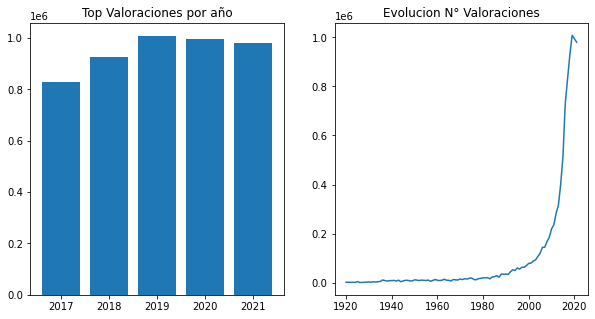

In [5]:
#Grafica 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax2.plot(val_año.release_year, val_año.Valoraciones)
ax2.set_title("Evolucion N° Valoraciones")

top_val_año = val_año.nlargest(5, "Valoraciones")
ax1.bar(top_val_año.release_year, top_val_año.Valoraciones)
ax1.set_title("Top Valoraciones por año")

top_val_año

**TOP 5 AÑOS CON MAYOR PROMEDIO DE VALORACIONES**

,release_year,Promedio_Valoraciones
1,2005,3.540239
7,2011,3.537525
8,2012,3.537075
2,2006,3.536455
16,2020,3.535198


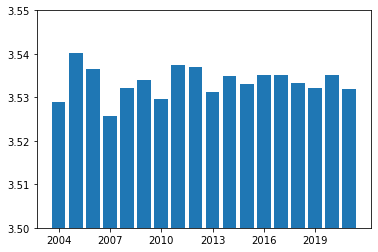

In [6]:
#Grafica 
fig, ax = plt.subplots()
ax.bar(prom_año.release_year, prom_año.Promedio_Valoraciones)

ax.set_ylim([3.5, 3.55])
plt.xticks(np.arange(min(prom_año.release_year), max(prom_año.release_year)+1, 3))

prom_año.nlargest(5, "Promedio_Valoraciones")

### **EDA-DIRECTOR**

_Arreglo de los datos_

In [7]:
#Agrupa los directores para contar cuantas valoraciones totales tiene cada uno
grupo = data.groupby("director")
val_dir = grupo.Valoraciones.sum().reset_index()

directores = val_dir.loc[val_dir["Valoraciones"] >= val_dir["Valoraciones"].median()].index #directores que tengan numero de valoraciones por encima de la media
prom_dir = grupo["Promedio_Valoraciones"].mean().iloc[directores].reset_index() #Promedio de valoraciones por año

**TOP 5 DIRECTORES POR NUMERO DE VALORACIONES**

,director,Valoraciones
5406,Mark Knight,29921
3716,Jay Chapman,13398
5269,Manny Rodriguez,10934
4080,John English,9213
6894,Rajiv Chilaka,9044


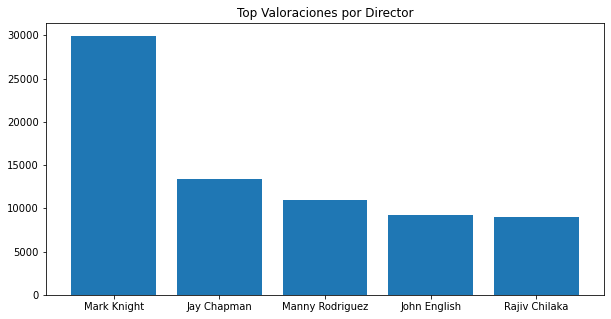

In [8]:
#Grafica 
fig, ax = plt.subplots(figsize=(10,5))

top_val_dir = val_dir.nlargest(5, "Valoraciones")
ax.bar(top_val_dir.director, top_val_dir.Valoraciones)
ax.set_title("Top Valoraciones por Director")

top_val_dir

**TOP 5 DIRECTORES CON MAYOR PROMEDIO DE VALORACIONES**

,director,Promedio_Valoraciones
93,"Ajay Bhuyan, Kunal Kohli",3.7
211,Ami Canaan Mann,3.7
497,"Benny Safdie, Josh Safdie",3.7
521,Bill Eagles,3.7
579,Brent Dawes,3.7


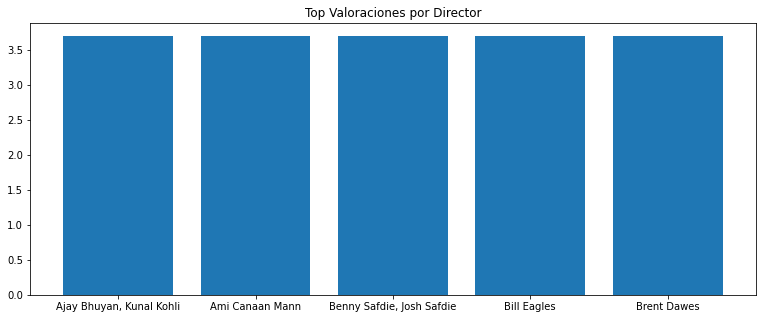

In [9]:
#Grafica 
fig, ax = plt.subplots(figsize=(13,5))

top_prom_dir = prom_dir.nlargest(5, "Promedio_Valoraciones")
ax.bar(top_prom_dir.director, top_prom_dir.Promedio_Valoraciones)
ax.set_title("Top Valoraciones por Director")

top_prom_dir

### **EDA-CAST**

_Arreglo de datos_

In [10]:
#Los datos cambian de tipo con la exportacion a CSV por lo que tenemos que corregirlo
data.cast = data.cast.apply(eval)

In [11]:
# convertir la columna 'cast' en una lista plana
lista_actores = data['cast'].explode().reset_index(drop=True)

# contar cuántas veces se repite cada nombre de actor
conteo_actores = lista_actores.value_counts().reset_index()
conteo_actores = conteo_actores.drop(index=0, axis=0)

In [12]:
actores_filtrados = conteo_actores.loc[conteo_actores.cast > 5] #Actores con mas de 5 peliculas
data_r = data.loc[data.Valoraciones > data.Valoraciones.mean()] #Registros con Numero de Valoraciones encima del promedio

#Ingresamos los datos en un Dataframe
act = []
prom = []

for i in actores_filtrados["index"]:
    filtro = data_r['cast'].apply(lambda x: i in x)
    promedio = data_r[filtro].Promedio_Valoraciones.mean()
    act.append(i)
    prom.append(promedio)
    
prom_act = pd.DataFrame({"Actor" : act, "Promedio_Valoracion" : prom})

**TOP 5 ACTORES CON MAYOR PROMEDIO DE VALORACIONES**

,Actor,Promedio_Valoracion
1669,Ami Koshimizu,3.650000
2019,Sushmita Mukherjee,3.640000
1573,Hirotaka Suzuoki,3.633333
1775,Ben Barnes,3.625000
1337,Kishore,3.620000


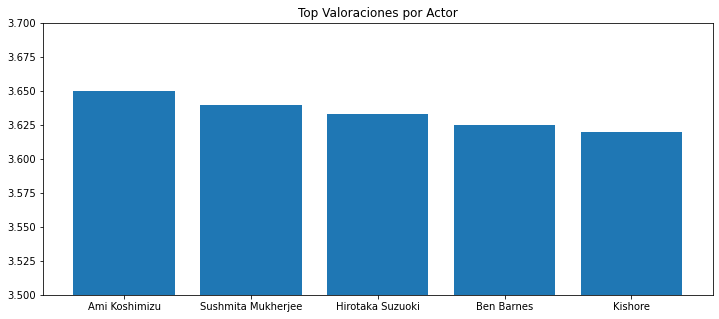

In [13]:
#Grafica 
fig, ax = plt.subplots(figsize=(12,5))

top_prom_act = prom_act.nlargest(5, "Promedio_Valoracion")
ax.bar(top_prom_act.Actor, top_prom_act.Promedio_Valoracion)
ax.set_title("Top Valoraciones por Actor")
ax.set_ylim([3.5, 3.7])

prom_act.nlargest(5, "Promedio_Valoracion")

### **EDA-GENERO**

_Arreglo de datos_

In [14]:
#Los datos cambian de tipo con la exportacion a CSV por lo que tenemos que corregirlo
data.listed_in = data.listed_in.apply(eval)

In [42]:
# convertir la columna 'listed_in' en una lista plana de generos
lista_generos = data['listed_in'].explode().reset_index(drop=True)

# contar cuántas veces se repite cada nombre de actor
conteo_generos = lista_generos.value_counts().reset_index()
conteo_generos = conteo_generos.drop(index=0, axis=0)

In [16]:
generos_filtrados = conteo_generos.loc[conteo_generos.listed_in > 5] #generos con mas de 5 registros
data_r = data.loc[data.Valoraciones > data.Valoraciones.mean()] #Registros con Numero de Valoraciones encima del promedio

#Llevamos los datos a un Dataframe
gen = []
prom = []

for i in generos_filtrados["index"]:
    filtro = data_r['listed_in'].apply(lambda x: i in x)
    promedio = data_r[filtro].Promedio_Valoraciones.mean()
    gen.append(i)
    prom.append(promedio)
    
prom_gen = pd.DataFrame({"Genero" : gen, "Promedio_Valoracion" : prom})

**TOP 5 GENEROS CON MAYOR NUMERO DE VALORACIONES**

,index,listed_in
1,Comedy,2925
2,International Movies,2674
3,Dramas,2402
4,Action,2116
5,Comedies,1624


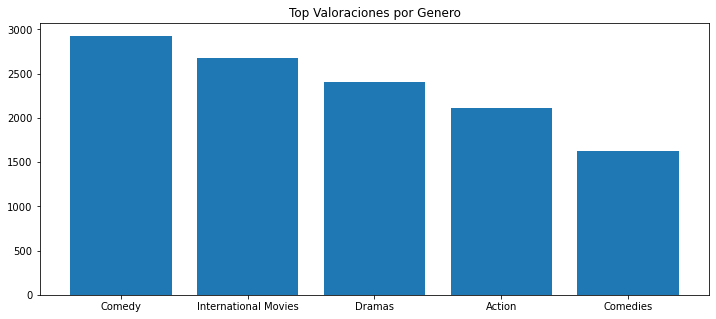

In [17]:
#Grafica 
fig, ax = plt.subplots(figsize=(12,5))

top_conteo_generos = conteo_generos.nlargest(5, "listed_in")
ax.bar(top_conteo_generos["index"], top_conteo_generos.listed_in)
ax.set_title("Top Valoraciones por Genero")

top_conteo_generos

**TOP 5 GENERO CON MAYOR PROMEDIO DE VALORACIONES**

,Genero,Promedio_Valoracion
100,Survival,3.575000
99,Game Show / Competition,3.566667
103,Variety,3.566667
84,Adult Animation,3.552632
97,Fitness,3.550000


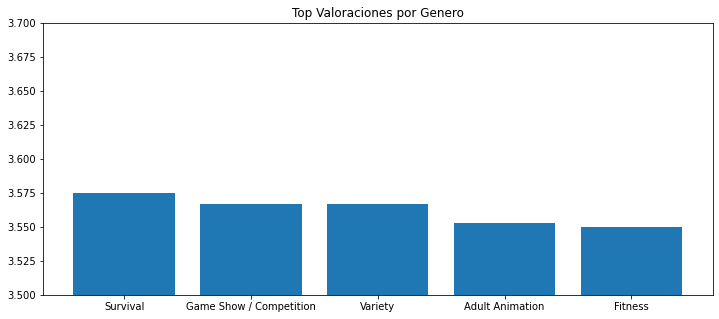

In [18]:
#Grafica 
fig, ax = plt.subplots(figsize=(12,5))

top_prom_gen = prom_gen.nlargest(5, "Promedio_Valoracion")
ax.bar(top_prom_gen.Genero, top_prom_gen.Promedio_Valoracion)
ax.set_title("Top Valoraciones por Genero")
ax.set_ylim([3.5, 3.7])

prom_gen.nlargest(5, "Promedio_Valoracion")

### **Heatmap**

C:\Users\Ale\AppData\Local\Temp/ipykernel_9392/1369872228.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_notnull.corr()


,release_year,duration_int,Valoraciones,Promedio_Valoraciones
release_year,1.000000,-0.151000,-0.003526,0.016956
duration_int,-0.151000,1.000000,0.006615,-0.002981
Valoraciones,-0.003526,0.006615,1.000000,0.001480
Promedio_Valoraciones,0.016956,-0.002981,0.001480,1.000000


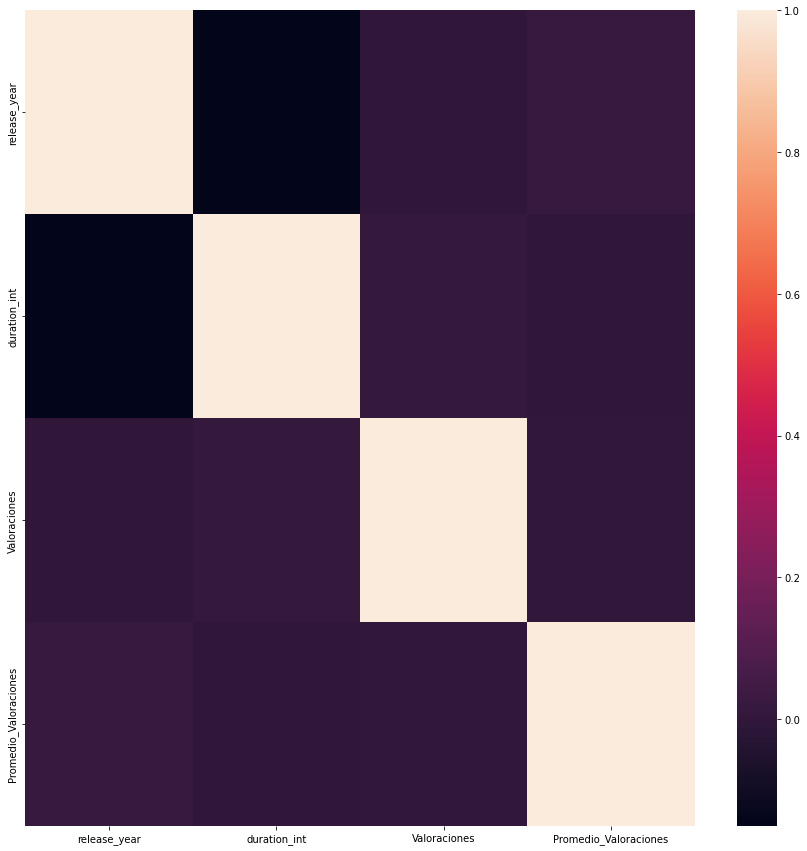

In [40]:
# Realizamos el mapa de calor para ver la correlación entre las variables
df = data
df_notnull = df[df.notnull().all(axis=1)]

corr = df_notnull.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, fmt= '.2f',annot_kws={'size': 15},
)
corr